# CUSTOMER ANALYSIS


**Activity 1**<br>
Aggregate data into one Data Frame using Pandas.<br>
Standardizing header names<br>
Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data<br>
Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints )<br>
Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns<br>
Removing duplicates<br>
Replacing null values – Replace missing values with means of the column (for numerical columns)<br>
**Activity 2**<br>
Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central<br>
Standardizing the data – Use string functions to standardize the text data (lower case)<br>
**Activity 3**<br>
Which columns are numerical?<br>
Which columns are categorical?<br>
Check and deal with NaN values. (Hint:Replacing null values – Replace missing values with means of the column (for numerical columns)).<br>
Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.<br>
**BONUS**: Put all the previously mentioned data transformations into a function/functions.<br>

### Lab Case Study<br>
Scenario<br>
You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.<br>

### Business Objectives<br>
Retain customers,<br>
analyze relevant customer data,<br>
develop focused customer retention programs.<br>
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.<br>

### Activities<br>
Refer to the Activities.md file where you will find guidelines for some of the activities that you want to do.<br>

### Data<br>
The csv files is provided in the folder. The columns in the file are self-explanatory.<br>

### Data Import

In [1]:
import numpy as np
import pandas as pd

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

In [62]:
df=pd.read_csv(r"C:\Users\oezkan\Desktop\DATA_WEITERBILDUNG\IRONHACK\TASKS\2.week\Data_Marketing_Customer_Analysis_Round2.csv")

In [63]:
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


### Data Description

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [65]:
df.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [66]:
df.isnull().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [67]:
df=df.drop(columns=['Unnamed: 0', 'Vehicle Type',"Customer","Number of Open Complaints"])

In [68]:
df["Customer Lifetime Value"]=round(df["Customer Lifetime Value"],0)

In [69]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'], errors='coerce')
df["month"]=list(map(lambda date:date.strftime(format="%B"),df["Effective To Date"]))
df = df.drop(columns = ["Effective To Date"])



In [70]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,Arizona,4809.0,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,February
1,California,2229.0,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,January
2,Washington,14948.0,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,February
3,Oregon,22332.0,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,January
4,Oregon,9025.0,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,NaN,31,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,January


In [71]:
# fillig missing values by ratio of other values.

In [72]:
df['State'].value_counts(normalize = True, dropna = False)


California    0.325573
Oregon        0.266636
Arizona       0.177544
Nevada        0.091017
Washington    0.081393
NaN           0.057837
Name: State, dtype: float64

In [73]:
df['State'].value_counts(normalize=True)


California    0.345559
Oregon        0.283004
Arizona       0.188442
Nevada        0.096605
Washington    0.086390
Name: State, dtype: float64

In [74]:
df['State'] = df['State'].fillna(pd.Series(np.random.choice(['California', 'Oregon', 'Arizona', 'Nevada', 'Washington'], p = [0.345559, 0.283004, 0.188442, 0.096605, 0.086390], size = len(df))))

In [75]:
# df['State'] = df['State'].fillna(pd.Series(np.random.choice(list(df['State'].value_counts().index, p = list(df['State'].value_counts().values), size = len(df))))

In [76]:
df["State"].value_counts()

California    3780
Oregon        3084
Arizona       2068
Nevada        1047
Washington     931
Name: State, dtype: int64

In [77]:
# filling missing values by "no response"

In [78]:

df["Response"].fillna("no response",inplace = True)

In [79]:
df["Response"]

0                 No
1                 No
2                 No
3                Yes
4                 No
            ...     
10905             No
10906             No
10907             No
10908             No
10909    no response
Name: Response, Length: 10910, dtype: object

In [80]:
# filling missing values by mean...

In [81]:
df["Months Since Last Claim"]

0         7.0
1         3.0
2        34.0
3        10.0
4         NaN
         ... 
10905     NaN
10906     7.0
10907    11.0
10908     0.0
10909    31.0
Name: Months Since Last Claim, Length: 10910, dtype: float64

In [82]:
df["Months Since Last Claim"].fillna(np.mean(df["Months Since Last Claim"]),inplace = True)

In [83]:
df["Months Since Last Claim"]

0         7.000000
1         3.000000
2        34.000000
3        10.000000
4        15.149071
           ...    
10905    15.149071
10906     7.000000
10907    11.000000
10908     0.000000
10909    31.000000
Name: Months Since Last Claim, Length: 10910, dtype: float64

In [84]:
 df=df.dropna()   # geri kalan missing valuelari sildik

In [85]:
df.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'month'],
      dtype='object')

## Transformation

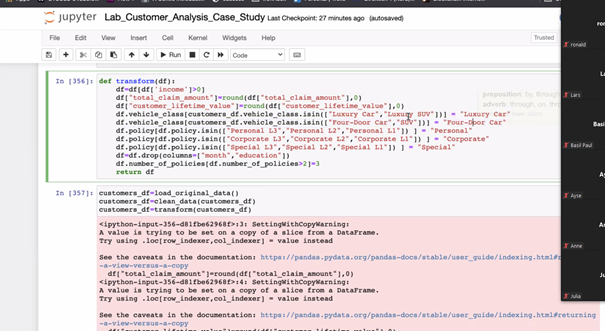

###  Plotting

In [86]:
import matplotlib.pyplot as plt


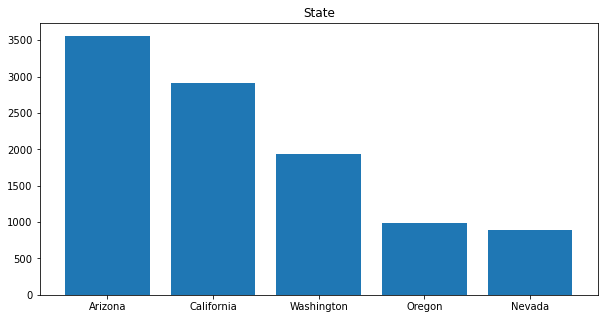

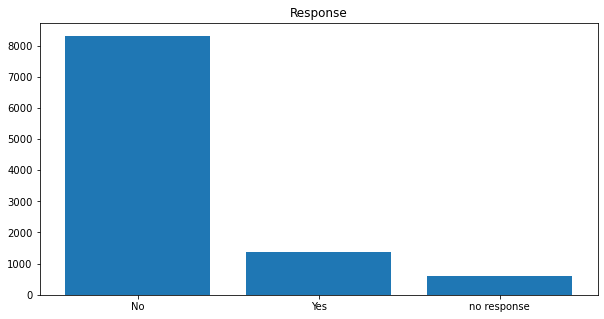

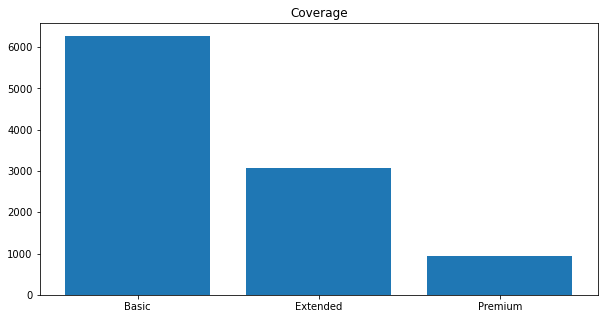

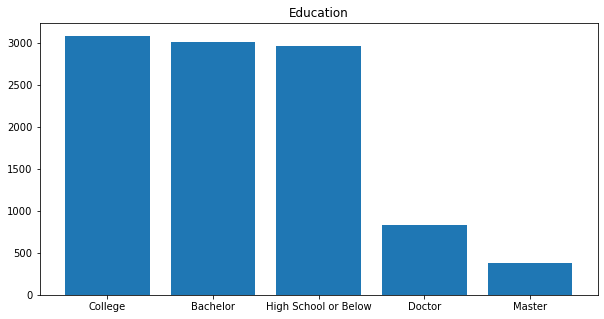

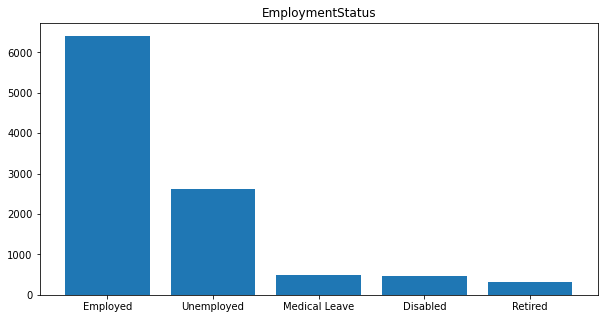

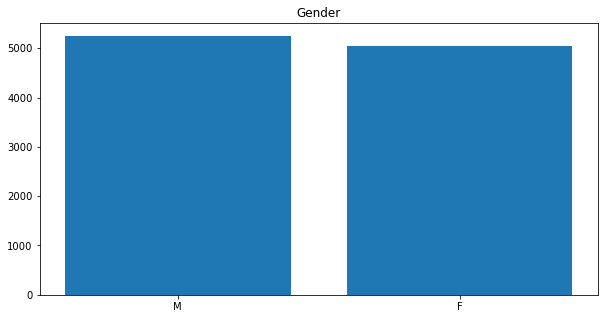

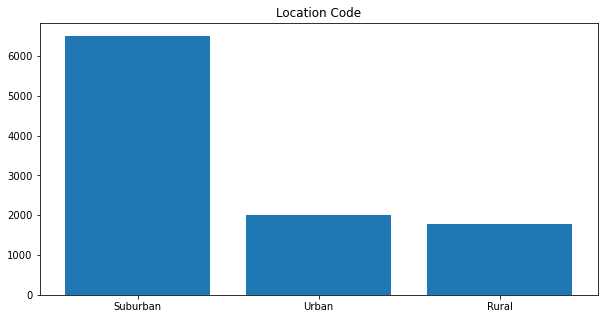

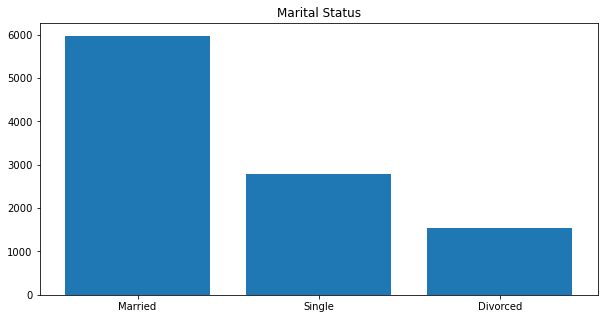

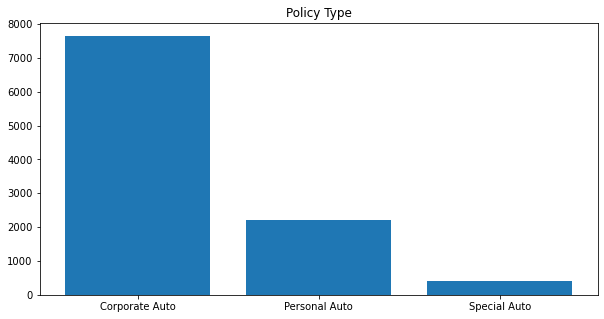

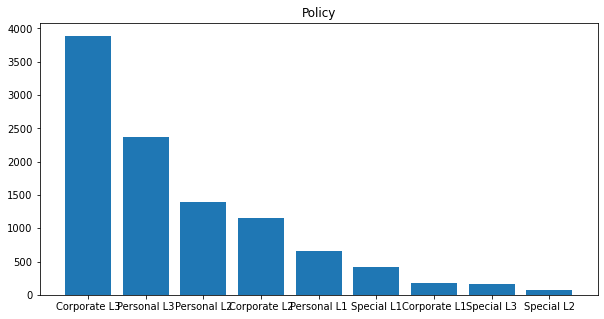

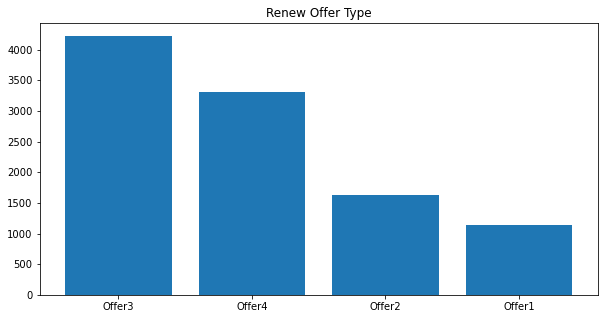

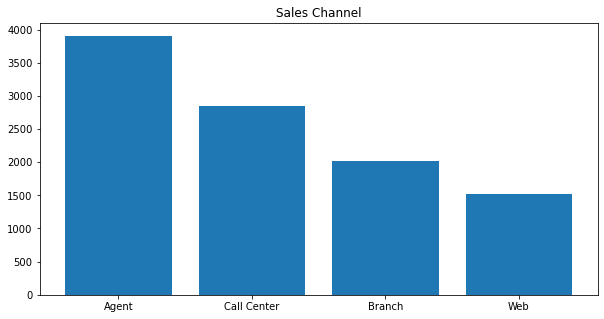

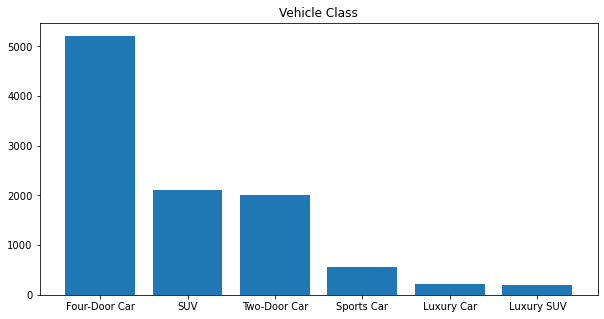

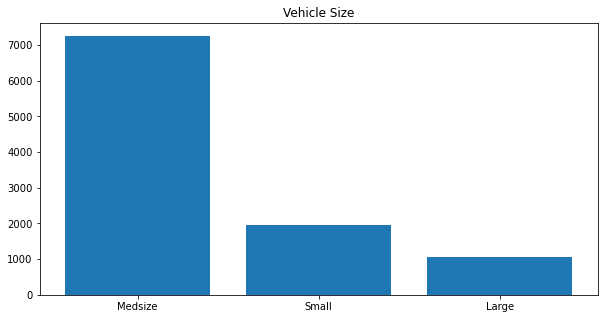

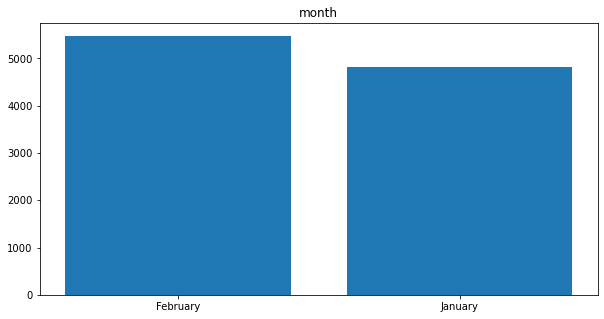

In [87]:
for c in df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(df[c].unique(), df[c].value_counts())
    plt.title(c)
    plt.show();

### Show a plot of the total number of responses

C:\Users\oezkan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


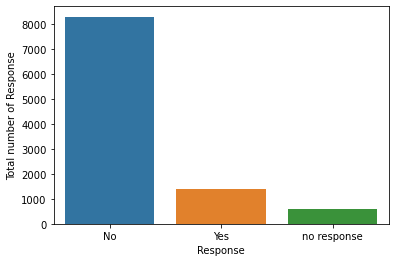

In [88]:
sns.countplot('Response', data=df)
plt.ylabel('Total number of Response')
plt.show()

### Show a plot of the response rate by the sales channel.


C:\Users\oezkan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


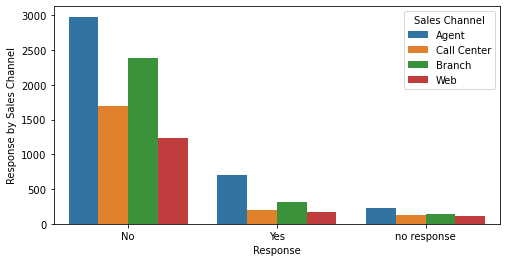

In [89]:
plt.figure(figsize=(8,4))
sns.countplot('Response', hue='Sales Channel', data=df)
plt.ylabel('Response by Sales Channel')
plt.show()

In [90]:
sns.barplot(x=response_rate_by_sales_chanel["sales channel"], y=response_rate_by_sales_chanel.index, hue=response_rate_by_sales_chanel["response"]).set_ylabel("response");

NameError: name 'response_rate_by_sales_chanel' is not defined

### Show a plot of the response rate by the total claim amount.


In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Total Claim Amount' , x='Response', data=df)
plt.ylabel('Response by Total Claim Amount')
plt.show()

### Show a plot of the response rate by income.


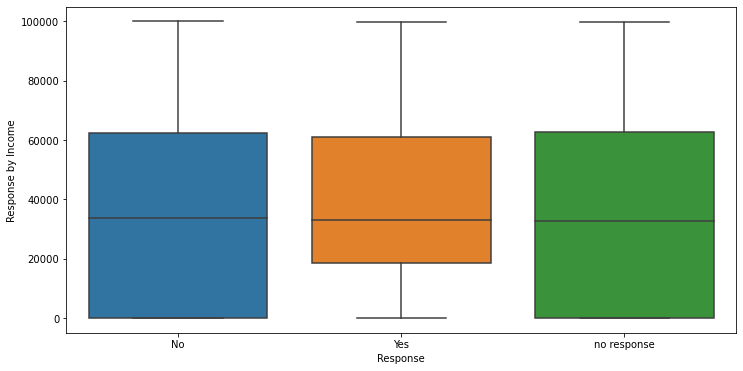

In [91]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Income' , x='Response', data=df)
plt.ylabel('Response by Income')
plt.show()

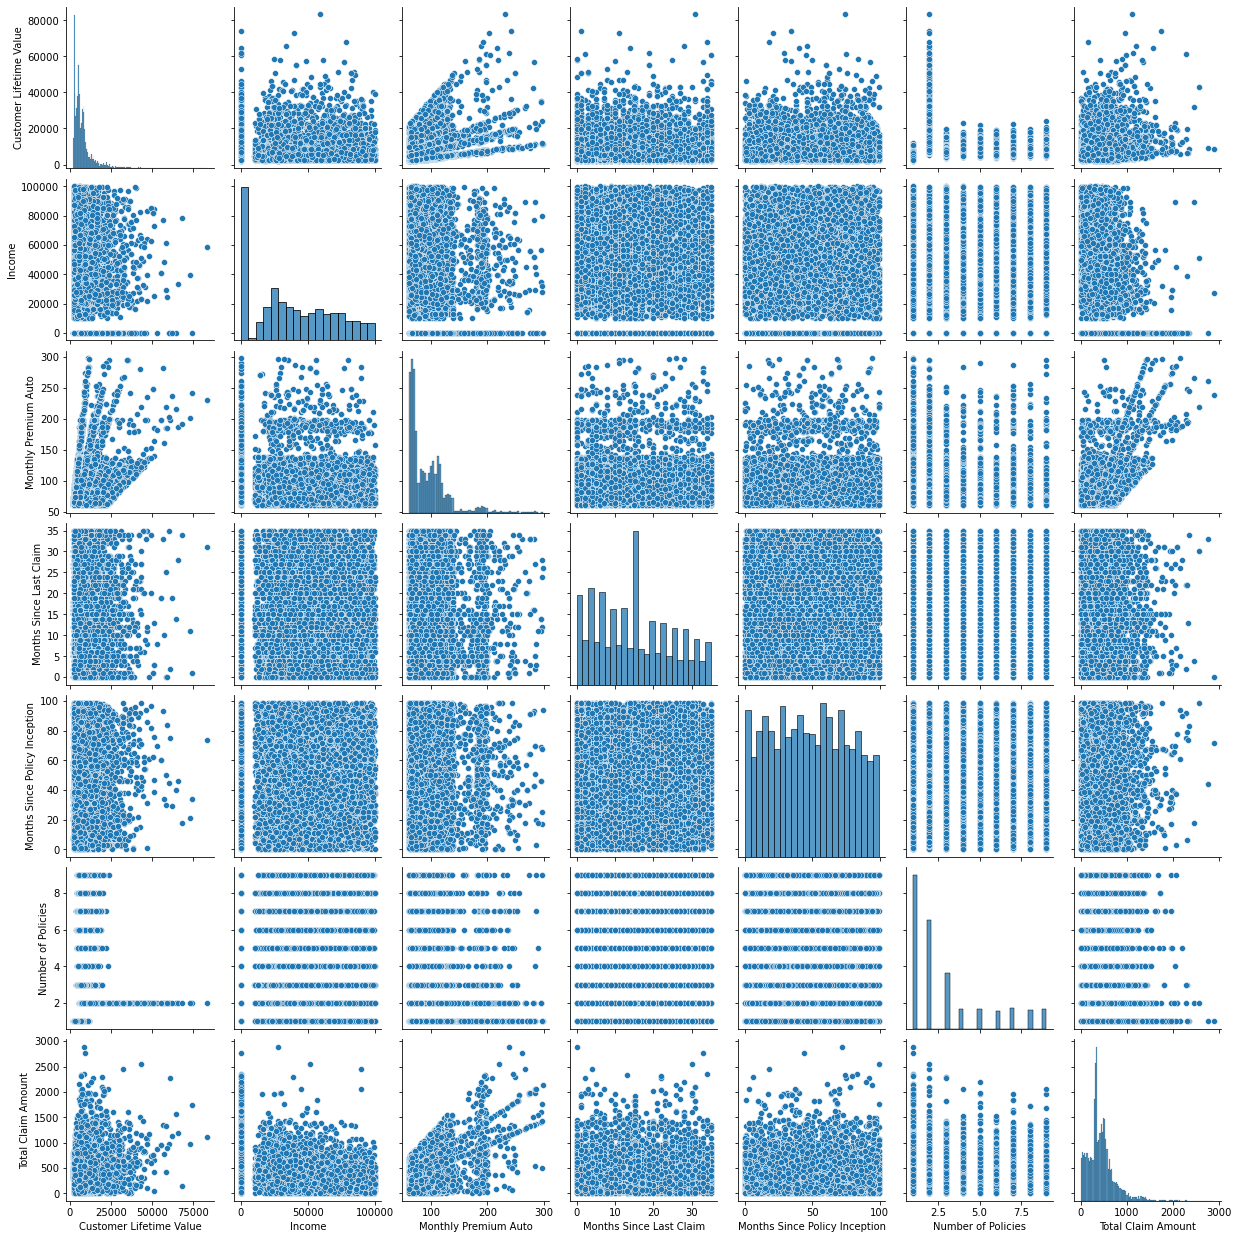

In [92]:
sns.pairplot(df)
plt.show()

C:\Users\oezkan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


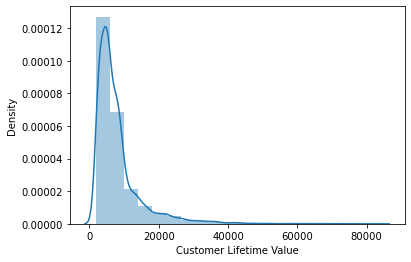

In [93]:
sns.distplot((df['Customer Lifetime Value']), bins=20);

In [94]:
monthly=boxcox(df['Customer Lifetime Value'],lmbda=0.02)

<AxesSubplot:ylabel='Count'>

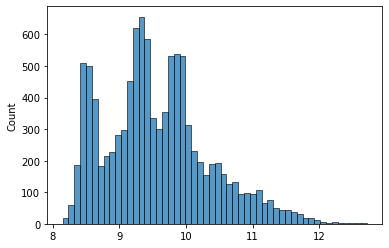

In [95]:
sns.histplot(monthly)

C:\Users\oezkan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

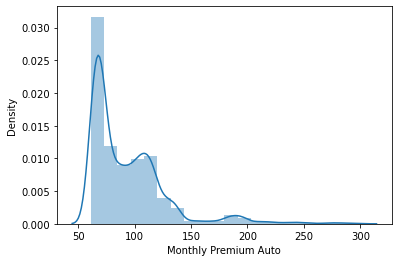

In [96]:

sns.distplot((df['Monthly Premium Auto']), bins=20)

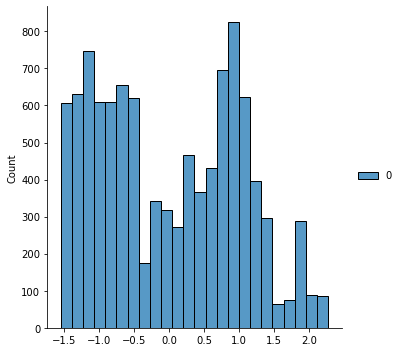

In [97]:
pt = PowerTransformer()
monthly=pt.fit_transform(df['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.displot(monthly)

<AxesSubplot:ylabel='Count'>

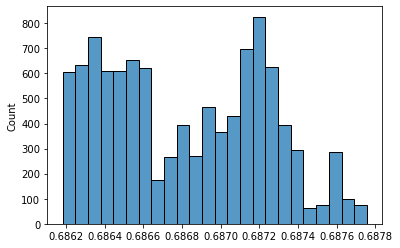

In [98]:
monthly,lam=boxcox(df['Monthly Premium Auto'])
sns.histplot(monthly)

<AxesSubplot:ylabel='Count'>

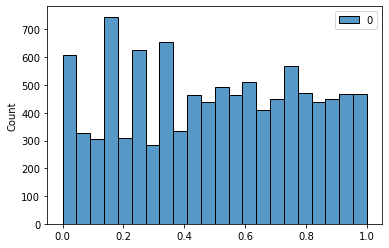

In [99]:

qt = QuantileTransformer()
monthly=qt.fit_transform(df['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.histplot(monthly)

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Total Claim Amount'>

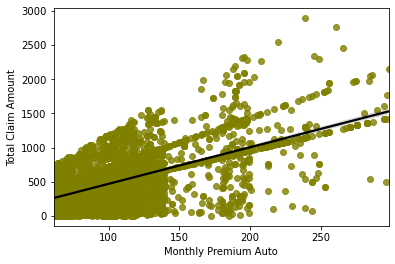

In [100]:

sns.regplot(x='Monthly Premium Auto',y='Total Claim Amount', data=df, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

In [101]:
df_numerical= df.select_dtypes(include=np.number).columns.tolist()
df_numerical

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Policies',
 'Total Claim Amount']

In [102]:
numericals = df[df_numerical]

In [103]:
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
0,4809.0,48029,61,7.000000,52,9,292.800000
1,2229.0,0,64,3.000000,26,1,744.924331
2,14948.0,22139,100,34.000000,31,2,480.000000
3,22332.0,49078,97,10.000000,3,2,484.013411
4,9025.0,23675,117,15.149071,31,7,707.925645
...,...,...,...,...,...,...,...
10905,15563.0,0,253,15.149071,40,7,1214.400000
10906,5259.0,61146,65,7.000000,68,6,273.018929
10907,23893.0,39837,201,11.000000,63,2,381.306996
10908,11972.0,64195,158,0.000000,27,6,618.288849


                               Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024960   
Income                                        0.024960  1.000000   
Monthly Premium Auto                          0.398187 -0.016119   
Months Since Last Claim                       0.011471 -0.027110   
Months Since Policy Inception                 0.017854 -0.001640   
Number of Policies                            0.020093 -0.010254   
Total Claim Amount                            0.226748 -0.357555   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.398187                 0.011471   
Income                                    -0.016119                -0.027110   
Monthly Premium Auto                       1.000000                 0.006142   
Months Since Last Claim                    0.006142                 1.000000   
Months Since Policy Inception              0.017673    

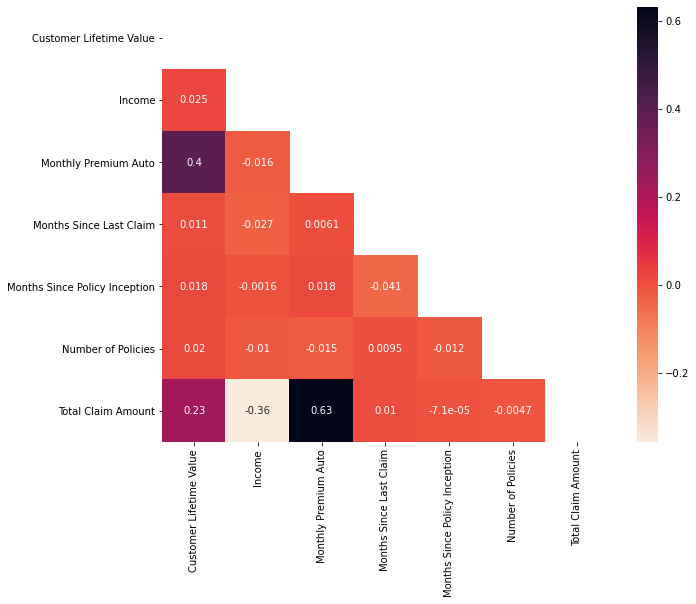

In [104]:
correlations = numericals.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

### X-Y split
### splitting the target variable from the dependent variables

In [105]:
X=df.drop('Total Claim Amount', axis=1)
y=df["Total Claim Amount"]

In [124]:
df


,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,Arizona,4809.0,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.000000,52,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,February
1,California,2229.0,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.000000,26,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,January
2,Washington,14948.0,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.000000,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,February
3,Oregon,22332.0,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.000000,3,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,January
4,Oregon,9025.0,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.0,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,253,15.149071,40,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,January
10906,Oregon,5259.0,No,Basic,College,Employed,F,61146,Urban,Married,65,7.000000,68,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,January
10907,Arizona,23893.0,No,Extended,Bachelor,Employed,F,39837,Rural,Married,201,11.000000,63,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,February
10908,California,11972.0,No,Premium,College,Employed,F,64195,Urban,Divorced,158,0.000000,27,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,February


In [106]:
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
0,4809.0,48029,61,7.000000,52,9,292.800000
1,2229.0,0,64,3.000000,26,1,744.924331
2,14948.0,22139,100,34.000000,31,2,480.000000
3,22332.0,49078,97,10.000000,3,2,484.013411
4,9025.0,23675,117,15.149071,31,7,707.925645
...,...,...,...,...,...,...,...
10905,15563.0,0,253,15.149071,40,7,1214.400000
10906,5259.0,61146,65,7.000000,68,6,273.018929
10907,23893.0,39837,201,11.000000,63,2,381.306996
10908,11972.0,64195,158,0.000000,27,6,618.288849


In [107]:
numericals.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
count,10288.000000,10288.000000,10288.000000,10288.000000,10288.000000,10288.000000,10288.000000
mean,7987.879277,37556.367904,93.237753,15.126662,48.023231,2.982698,434.395277
std,6808.549692,30358.660234,34.430735,9.800077,27.927807,2.399672,291.620401
min,1898.000000,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.000000,0.000000,68.000000,7.000000,24.000000,1.000000,268.808331
50%,5780.500000,33767.500000,83.000000,15.000000,48.000000,2.000000,383.403043
75%,8984.750000,62329.000000,109.000000,23.000000,71.000000,4.000000,547.200000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,9.000000,2893.239678


### Normalization

In [108]:

X_scaled=StandardScaler().fit_transform(numericals)
X_scaled.shape

(10288, 7)

In [109]:
X_scaled


array([[-0.46691791,  0.34498035, -0.93635294, ...,  0.14240152,
         2.50767373, -0.48557014],
       [-0.84587165, -1.23714924, -0.84921725, ..., -0.78861549,
        -0.8262774 ,  1.06489171],
       [ 1.02231155, -0.50786554,  0.19641103, ..., -0.60957375,
        -0.40953351,  0.15639146],
       ...,
       [ 2.33616475,  0.0751266 ,  3.12997923, ...,  0.53629334,
        -0.40953351, -0.18205469],
       [ 0.58519282,  0.87750667,  1.88103435, ..., -0.75280714,
         1.25744205,  0.63062292],
       [-0.16595813, -1.23714924,  0.22545626, ..., -1.68382415,
         0.00721038,  2.01410006]])

In [110]:

##def normalize(X):
##    X_mean=X.mean(axis=0)
##    X_std=X.std(axis=0)
##    X_std[X_std==0]=1.0
##    X=(X-X_mean)/X_std
##    return X

##X_num=normalize(X_num)

In [111]:
#def norm(col):
   # total = 0
   # for i in col:
     #   total += i ** 2
    #return total**0.5


#for i in numericals:
  #  numericals[f"{i}"] = numericals[f"{i}"]/norm(numericals[f"{i}"])

### CATEGORICAL DATA

In [112]:

categoricals_features = X.select_dtypes(object)
categoricals_features.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,month
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,February
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,January
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,February
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,January
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,January


In [113]:

# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [114]:
categoricals_features

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Response_no response,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_January
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1
10906,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
10907,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
10908,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


## concat numerical and categorical features....

In [115]:
all_features=pd.concat([numericals, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Response_no response,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_January
0,4809.0,48029,61,7.000000,52,9,292.800000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2229.0,0,64,3.000000,26,1,744.924331,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
2,14948.0,22139,100,34.000000,31,2,480.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,22332.0,49078,97,10.000000,3,2,484.013411,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
4,9025.0,23675,117,15.149071,31,7,707.925645,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


## Train Test Split

In [186]:
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [187]:
X_train

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Response_no response,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_January
809,5421.0,40376,69,16.0,46,8,427.874055,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3429,25465.0,13663,97,1.0,66,2,465.600000,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3800,5936.0,63833,73,17.0,69,3,199.460544,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
539,2359.0,19864,63,22.0,96,1,352.394515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
5196,6289.0,50269,80,15.0,88,3,32.228778,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,15148.0,41082,63,23.0,94,2,106.647493,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2074,3994.0,17672,110,28.0,16,1,792.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1
3668,4428.0,58577,110,6.0,62,1,303.872752,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
9095,8659.0,62464,109,23.0,45,4,400.181882,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [178]:
X_test

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Response_no response,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_January
7354,6791.0,0,101,19.0,11,8,727.200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5374,6748.0,68423,85,14.0,81,7,324.413656,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
10091,7366.0,30250,93,1.0,98,6,398.100233,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9974,5369.0,59601,67,28.0,2,6,321.600000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
5636,9806.0,47197,81,19.0,91,2,76.112618,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,19644.0,84488,61,33.0,71,2,208.885686,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
10687,6806.0,37839,86,35.0,77,9,465.633954,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1
166,2773.0,73478,68,2.0,38,1,241.888780,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
2366,5452.0,55898,69,35.0,87,6,441.951758,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


In [179]:
y_train

3985     236.614219
9321     699.517349
7025     249.799752
10626     39.497930
7970     680.047456
            ...    
5391     302.400000
1925      61.536107
3222     777.600000
4586     478.609999
1602     184.516188
Name: Total Claim Amount, Length: 3086, dtype: float64

In [180]:
y_test

7354     727.200000
5374     324.413656
10091    398.100233
9974     321.600000
5636      76.112618
            ...    
5474     208.885686
10687    465.633954
166      241.888780
2366     441.951758
7613     460.800000
Name: Total Claim Amount, Length: 7202, dtype: float64

In [190]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # model prediction
y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

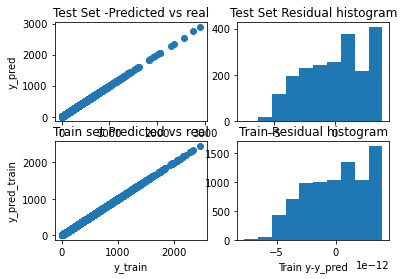

In [191]:

# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [192]:

train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 6.536187729802871e-24 -- test MSE: 6.364678811788209e-24


In [193]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 2.556596904050944e-12 -- test RMSE: 2.5228315068169353e-12


In [194]:

train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 6.536187729802871e-24 -- test MAE: 6.364678811788209e-24


In [195]:

r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

1.0
1.0


In [196]:
print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

train R2: 1.0 -- test R2: 1.0


In [197]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  1.0


In [188]:
model = LinearRegression()


In [189]:
model.fit(X_train,y_train)

LinearRegression()

In [183]:
model.predict(X_test)

array([727.2     , 324.413656, 398.100233, ..., 241.88878 , 441.951758,
       460.8     ])

In [184]:
y_test

7354     727.200000
5374     324.413656
10091    398.100233
9974     321.600000
5636      76.112618
            ...    
5474     208.885686
10687    465.633954
166      241.888780
2366     441.951758
7613     460.800000
Name: Total Claim Amount, Length: 7202, dtype: float64

In [185]:
model.score(X_test,y_test)


1.0

In [167]:
model.coef_


array([ 8.66609052e-17, -1.38777878e-17,  2.10942375e-15,  1.27675648e-15,
       -5.28223298e-16,  1.81855399e-14,  1.00000000e+00,  1.05032085e-15,
        7.12591878e-16,  4.46508336e-15,  7.01191492e-15,  2.10384011e-15,
        1.51430687e-15,  4.42780036e-15,  6.65862764e-15,  2.94886728e-15,
        9.26430428e-16,  1.84704682e-15, -4.14626016e-16, -2.07066352e-15,
        4.03292715e-16, -9.10045930e-15,  4.60623293e-16,  2.83688275e-16,
       -7.05360249e-15, -5.02743192e-15, -4.53131456e-15, -4.32168407e-15,
        1.22219400e-15,  1.31631631e-15,  3.94174575e-15,  1.59606757e-15,
        9.84116759e-17,  1.52842691e-15, -4.06277659e-16, -1.64644231e-15,
       -1.31876592e-15,  4.28130093e-15,  1.53628737e-15, -7.32961326e-16,
       -3.75811578e-17,  8.85129101e-16,  1.66924444e-15, -6.72625475e-16,
        1.89144490e-14, -1.40897493e-15,  5.42187822e-15, -1.25076273e-15,
       -5.59719372e-17, -6.30165408e-16, -1.81430392e-15,  1.26548078e-15])

In [168]:
model.intercept_

-5.115907697472721e-13

In [169]:
model.coef_ * X_test + model.intercept_ 


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Response_no response,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_January
7108,3.970488e-13,-1.359635e-12,-3.238521e-13,-4.835021e-13,-5.607155e-13,-4.752197e-13,49.451117,-5.115908e-13,-5.115908e-13,-5.071257e-13,-5.115908e-13,-5.094869e-13,-5.115908e-13,-5.071630e-13,-5.115908e-13,-5.086419e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.136614e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.100545e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.122209e-13,-5.115908e-13,-5.115908e-13
3667,3.870678e-12,-1.650693e-12,1.365574e-14,-5.103140e-13,-5.443406e-13,-4.752197e-13,753.760098,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.100765e-13,-5.071630e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.120054e-13,-5.136614e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.113071e-13,-5.115908e-13,-5.166182e-13,-5.161221e-13,-5.115908e-13,-5.103686e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.114924e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.100545e-13,-5.115908e-13,-5.115908e-13,-5.107056e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.129997e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.134051e-13,-5.115908e-13
9433,-5.003479e-14,-5.115908e-13,-3.576028e-13,-4.898859e-13,-5.348326e-13,-3.842920e-13,496.474767,-5.115908e-13,-5.115908e-13,-5.071257e-13,-5.115908e-13,-5.094869e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.097437e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.111301e-13,-5.113071e-13,-5.186444e-13,-5.115908e-13,-5.161221e-13,-5.115908e-13,-5.103686e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.119970e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.100545e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.099215e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.116467e-13,-5.122209e-13,-5.115908e-13,-5.115908e-13
6763,1.747406e-14,-1.688732e-12,-3.512746e-13,-5.052070e-13,-5.184577e-13,-4.206631e-13,219.879452,-5.105404e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.071630e-13,-5.115908e-13,-5.086419e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.136614e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.113071e-13,-5.115908e-13,-5.166182e-13,-5.161221e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.099947e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.115908e-13,-5.122209e-13,-5.115908e-13,-5.103253e-13
9352,1.7

In [170]:
y_test

7108     49.451117
3667    753.760098
9433    496.474767
6763    219.879452
9352    734.400000
           ...    
1659    177.234000
555     456.290338
1094    738.222494
6230    187.683707
9219    636.982333
Name: Total Claim Amount, Length: 3087, dtype: float64

In [171]:
X_test.shape


(3087, 52)

In [172]:
model.coef_.shape


(52,)

In [173]:
model.intercept_.shape

()

In [174]:
np.dot(X_test, model.coef_) + model.intercept_


array([ 49.451117, 753.760098, 496.474767, ..., 738.222494, 187.683707,
       636.982333])

In [175]:
y_test

7108     49.451117
3667    753.760098
9433    496.474767
6763    219.879452
9352    734.400000
           ...    
1659    177.234000
555     456.290338
1094    738.222494
6230    187.683707
9219    636.982333
Name: Total Claim Amount, Length: 3087, dtype: float64

## split test and train...

In [117]:
X_train

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Response_no response,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_January
2810,8997.0,54230,112,10.0,21,9,537.600000,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
6025,5678.0,0,76,8.0,44,3,364.800000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
9562,5906.0,59848,73,5.0,98,3,131.614733,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
10682,4763.0,65795,62,2.0,85,3,49.011099,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1
8371,8540.0,55478,71,7.0,1,2,339.399593,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,3732.0,0,96,31.0,34,1,460.800000,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3791,15839.0,44930,132,19.0,42,2,111.049063,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
8687,16304.0,90008,137,13.0,3,2,406.986034,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1
9515,8193.0,54840,72,18.0,59,2,468.728516,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Apply Linear Regression

In [118]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # model prediction
y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

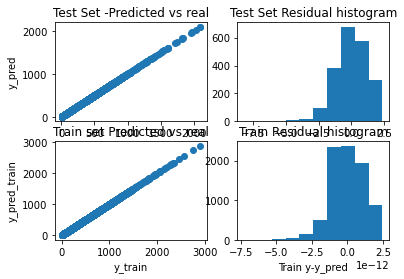

In [119]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [120]:

train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))


train MSE: 1.3426339684255446e-24 -- test MSE: 1.3883782241507745e-24


In [123]:
model.score(X_test,y_test)


1.0

### Activity 1

#### Standardizing header names




In [106]:
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower())
print(cols)

['unnamed: 0', 'customer', 'state', 'customer lifetime value', 'response', 'coverage', 'education', 'effective to date', 'employmentstatus', 'gender', 'income', 'location code', 'marital status', 'monthly premium auto', 'months since last claim', 'months since policy inception', 'number of open complaints', 'number of policies', 'policy type', 'policy', 'renew offer type', 'sales channel', 'total claim amount', 'vehicle class', 'vehicle size', 'vehicle type']


In [8]:
df.columns = cols

In [9]:
df.head(5)

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


#### Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data

In [10]:
df = df.drop(['customer'], axis =1)

In [11]:
df.head(5)

,unnamed: 0,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


#### Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints )

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   state                          10279 non-null  object 
 2   customer lifetime value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective to date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location code                  10910 non-null  object 
 11  marital status                 10910 non-null  object 
 12  monthly premium auto           10910 non-null 

In [13]:
df["customer lifetime value"]

0         4809.216960
1         2228.525238
2        14947.917300
3        22332.439460
4         9025.067525
             ...     
10905    15563.369440
10906     5259.444853
10907    23893.304100
10908    11971.977650
10909     6857.519928
Name: customer lifetime value, Length: 10910, dtype: float64

In [14]:
df["number of open complaints"].unique()

array([ 0., nan,  3.,  1.,  2.,  4.,  5.])

In [15]:
df["number of open complaints"].value_counts()      # len()

0.0    8160
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number of open complaints, dtype: int64

In [16]:
df["number of open complaints"]



0        0.0
1        0.0
2        0.0
3        0.0
4        NaN
        ... 
10905    NaN
10906    0.0
10907    0.0
10908    4.0
10909    0.0
Name: number of open complaints, Length: 10910, dtype: float64

#### Assign the list with the lower case names to the "columns" attribute of the dataframe

In [17]:
df.head(20)

,unnamed: 0,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
5,5,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,50549,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,6,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,7,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
8,8,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
9,9,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,70961,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN


#### Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints )??????

In [18]:
df["customer lifetime value"] = df["customer lifetime value"].astype("float")


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   state                          10279 non-null  object 
 2   customer lifetime value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective to date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location code                  10910 non-null  object 
 11  marital status                 10910 non-null  object 
 12  monthly premium auto           10910 non-null 

#### Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns

In [20]:
df["gender"].unique()

array(['M', 'F'], dtype=object)

In [21]:
df["state"].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

In [22]:
df["state"].value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [23]:
df["state"].isnull().sum()          # there are 631 missing value in the state column???? What should I do about that?

631

#### Removing duplicates

In [24]:
# actually changes the dataset (and returns no output)
df.drop_duplicates(inplace=True)

In [25]:
df.info()        # We have still 10910 data, it's mean, there is no duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   state                          10279 non-null  object 
 2   customer lifetime value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective to date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location code                  10910 non-null  object 
 11  marital status                 10910 non-null  object 
 12  monthly premium auto           10910 non-null 

#### Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

#### Standardizing the data – Use string functions to standardize the text data (lower case)

#### Which columns are numerical?

#### Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February

In [26]:
df["date"] = pd.to_datetime(df["effective to date"],errors = 'coerce',format = "%m/%d/%y")


In [27]:
df["date"]

0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: date, Length: 10910, dtype: datetime64[ns]

### Activity 4

#### Show a plot of the total number of responses

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Activity 4<br>
Show a plot of the total number of responses.<br>
Show a plot of the response rate by the sales channel.<br>
Show a plot of the response rate by the total claim amount.<br>
Show a plot of the response rate by income.<br>
Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed.<br>
Plot the Correlation Heatmap.<br>
Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.<br>

In [29]:
df.head(5)

,unnamed: 0,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,date
0,0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17


In [30]:
df["response"].isna().sum()

631

In [31]:

df["response"].fillna("no response",inplace = True)


# ENCODING





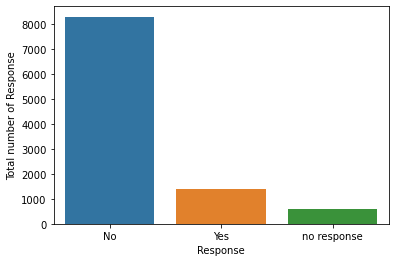

In [131]:
sns.countplot('Response', data=df)
plt.ylabel('Total number of Response')
plt.show()

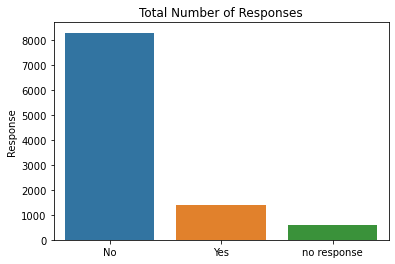

In [133]:
sns.barplot(x = df['Response'].value_counts().index, y = df["Response"].value_counts()).set_title("Total Number of Responses");


In [33]:
type(df["response"].value_counts())


pandas.core.series.Series

In [34]:
df["response"].value_counts().index

Index(['No', 'Yes', 'no response'], dtype='object')

In [35]:

df["sales channel"].isnull().sum()

0

#### Show a plot of the response rate by the sales channel.

In [36]:
response_rate_by_sales_chanel=df.groupby(["response","sales channel"]).count().reset_index()                

In [37]:
response_rate_by_sales_chanel.head(20)

,response,sales channel,unnamed: 0,state,customer lifetime value,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,total claim amount,vehicle class,vehicle size,vehicle type,date
0,No,Agent,3148,3148,3148,3148,3148,3148,3148,3148,...,2967,3148,3148,3148,3148,3148,2981,2981,1581,3148
1,No,Branch,2539,2539,2539,2539,2539,2539,2539,2539,...,2412,2539,2539,2539,2539,2539,2393,2393,1256,2539
2,No,Call Center,1792,1792,1792,1792,1792,1792,1792,1792,...,1669,1792,1792,1792,1792,1792,1692,1692,900,1792
3,No,Web,1334,1334,1334,1334,1334,1334,1334,1334,...,1252,1334,1334,1334,1334,1334,1242,1242,662,1334
4,Yes,Agent,742,742,742,742,742,742,742,742,...,703,742,742,742,742,742,701,701,366,742
5,Yes,Branch,326,326,326,326,326,326,326,326,...,312,326,326,326,326,326,307,307,138,326
6,Yes,Call Center,221,221,221,221,221,221,221,221,...,209,221,221,221,221,221,203,203,112,221
7,Yes,Web,177,177,177,177,177,177,177,177,...,164,177,177,177,177,177,169,169,100,177
8,no response,Agent,231,0,231,231,231,231,231,231,...,217,231,231,231,231,231,221,221,110,231
9,no response,Branch,157,0,157,157,157,157,157,157,...,147,157,157,157,157,157,147,147,91,157


C:\Users\oezkan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


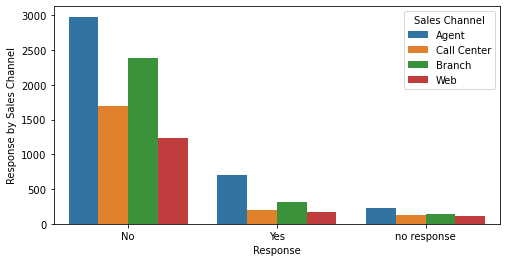

In [136]:
plt.figure(figsize=(8,4))
sns.countplot('Response', hue='Sales Channel', data=df)
plt.ylabel('Response by Sales Channel')
plt.show()

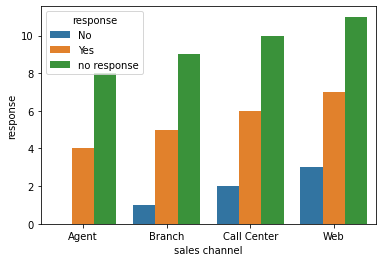

In [38]:
sns.barplot(x=response_rate_by_sales_chanel["sales channel"], y=response_rate_by_sales_chanel.index, hue=response_rate_by_sales_chanel["response"]).set_ylabel("response");

#### Show a plot of the response rate by the total claim amount.

In [39]:
response_rate_by_totalclaimamount=df.groupby(["response"]).agg({'total claim amount':'sum'}).reset_index()



In [40]:
response_rate_by_totalclaimamount

,response,total claim amount
0,No,3.823543e+06
1,Yes,6.553923e+05
2,no response,2.656961e+05


In [41]:
response_rate_by_totalclaimamount1 = df.groupby(['response','total claim amount']).size().reset_index()


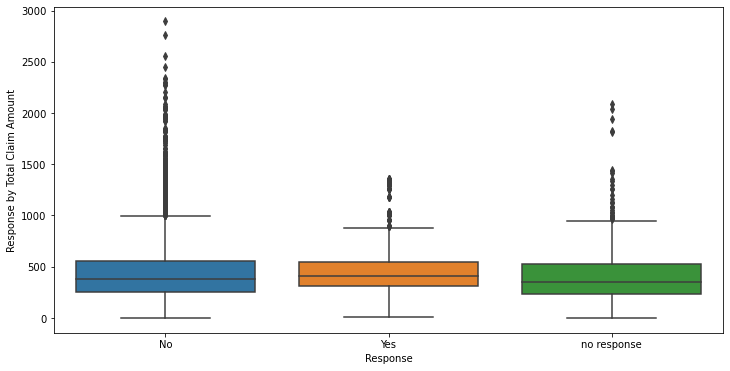

In [141]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Total Claim Amount' , x='Response', data=df)
plt.ylabel('Response by Total Claim Amount')
plt.show()

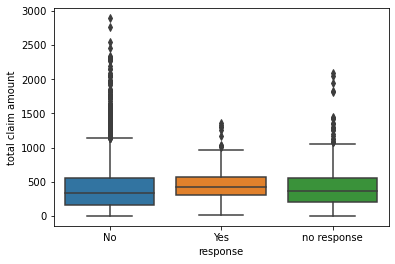

In [42]:
sns.boxplot(x=response_rate_by_totalclaimamount1["response"], y=response_rate_by_totalclaimamount1["total claim amount"]).set_ylabel("total claim amount");

In statistics, a quartile is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size. The data must be ordered from smallest to largest to compute quartiles; as such, quartiles are a form of order statistic. The three main quartiles are as follows:

The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.


In [43]:
response_rate_by_income=df.groupby(["response","income"]).count().reset_index()    

In [44]:
df["total claim amount"].isnull().sum()

0

#### Show a plot of the response rate by income.

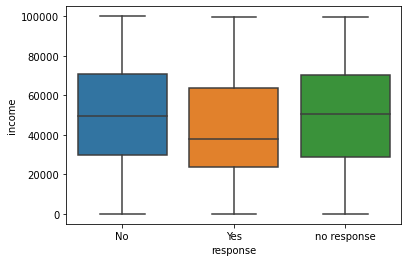

In [45]:

sns.boxplot(x=response_rate_by_income["response"], y=response_rate_by_income["income"]).set_ylabel("income");

#### Don't Limit your creativity! plot Any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed.

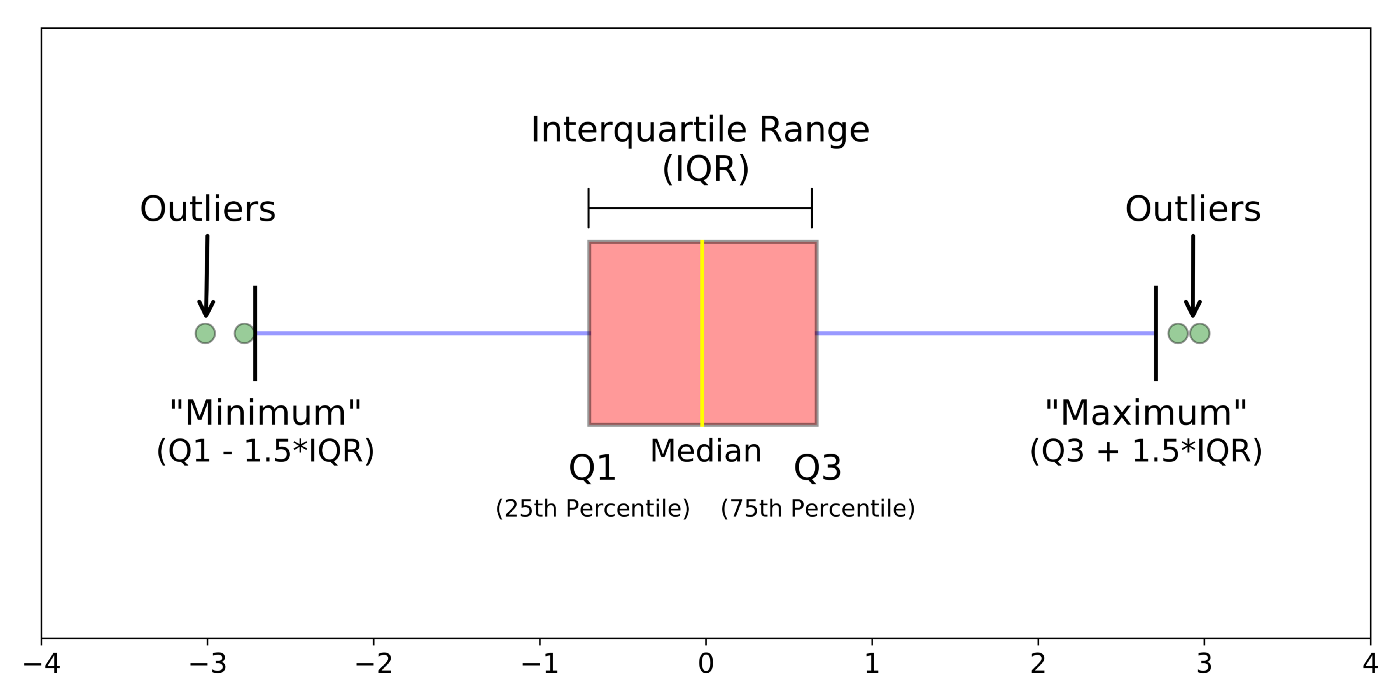

#### Plot the Correlation Heatmap

In [46]:
df.corr()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
unnamed: 0,1.000000,0.001355,0.008910,0.000863,0.007958,0.012795,0.007325,0.002319,-0.000593
customer lifetime value,0.001355,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
monthly premium auto,0.000863,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
months since last claim,0.007958,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months since policy inception,0.012795,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
number of open complaints,0.007325,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number of policies,0.002319,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
total claim amount,-0.000593,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


<AxesSubplot:>

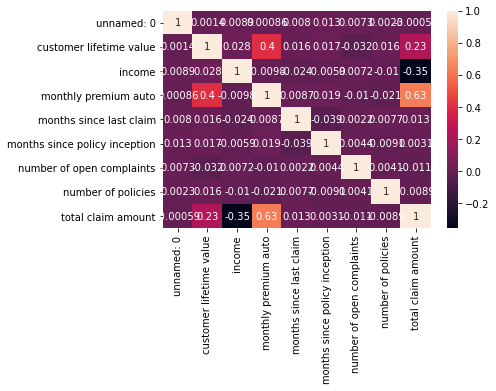

In [47]:
sns.heatmap(df.corr(), annot = True)


In [48]:
correlation_df = round(df.corr(), 2)


<AxesSubplot:>

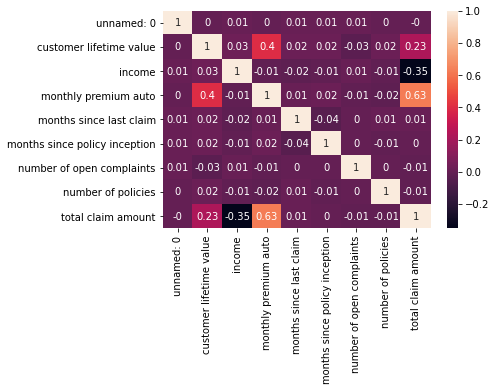

In [49]:
sns.heatmap(correlation_df, annot = True)


In [50]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.color_palette("viridis_r", as_cmap=True)



<AxesSubplot:>

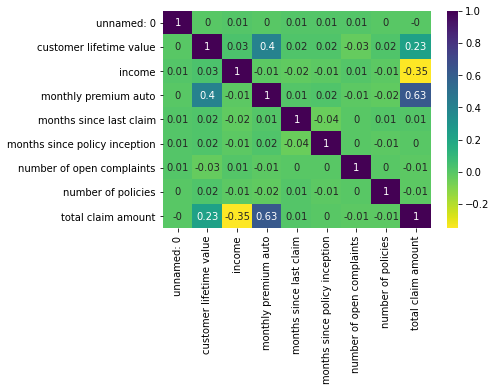

In [51]:
sns.heatmap(correlation_df, annot = True, cmap = cmap)


In [52]:
cmap = sns.color_palette("viridis", as_cmap=True)


https://seaborn.pydata.org/tutorial/color_palettes.html


#### Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

## Activity 5<br>
Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)<br>



In [53]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
df_numerical= df.select_dtypes(include=np.number).columns.tolist()
df_numerical

['unnamed: 0',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [55]:
df.drop("unnamed: 0", inplace = True,axis = "columns")

In [56]:
numericals = df[df_numerical[1:]]

In [57]:
numericals.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


In [58]:
df_categorical= df.select_dtypes(include=np.object).columns.tolist()
df_categorical

['state',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size',
 'vehicle type']

In [59]:
categoricals = df[df_categorical]

In [60]:
categoricals

,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [67]:
from sklearn.preprocessing import OneHotEncoder


In [84]:
categoricals["sales channel"].value_counts().index


Index(['Agent', 'Branch', 'Call Center', 'Web'], dtype='object')

In [85]:
enc = OneHotEncoder(handle_unknown='ignore')


In [87]:
new_df = pd.DataFrame(channel, columns = categoricals["sales channel"].value_counts().index)


In [88]:
new_df.head()

,Agent,Branch,Call Center,Web
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [89]:
model_data = pd.concat([numericals, new_df], axis=1)


In [90]:
model_data.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,Agent,Branch,Call Center,Web
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,1.0,0.0,0.0,0.0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,0.0,0.0,1.0,0.0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0.0,0.0,1.0,0.0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,0.0,1.0,0.0,0.0
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,0.0,1.0,0.0,0.0


In [91]:
sls_channel = enc.fit_transform(categoricals["sales channel"].values.reshape(-1,1))



In [92]:
sls_channel

<10910x4 sparse matrix of type '<class 'numpy.float64'>'
	with 10910 stored elements in Compressed Sparse Row format>

In [93]:
channel = sls_channel.toarray()


In [94]:
channel

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [95]:
df["effective to date"].dtype


dtype('O')

In [96]:
def extract_month(data):
    return "January" if data[0] == "1" else "February"

In [97]:
df["effective to date"] = df["effective to date"].apply(extract_month)


In [98]:
df["effective to date"]

0        February
1        February
2        February
3        February
4        February
           ...   
10905    February
10906    February
10907    February
10908    February
10909    February
Name: effective to date, Length: 10910, dtype: object

Now we will try to check the normality of the numerical variables visually<br>

Use seaborn library to construct distribution plots for the numerical variables<br>
Use Matplotlib to construct histograms<br>
Do the distributions for different numerical variables look like a normal distribution<br>
Normalize (numericals)<br>

'customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount'

In [65]:
bins = [i*10000 for i in range(10)]


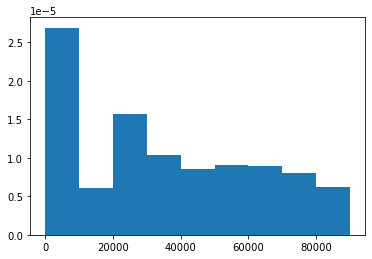

In [66]:
plt.hist(numericals["income"], bins=bins, density=True);

In [204]:
def draw_histograms(data):
    for col in data:
        plt.hist(data[f"{col}"], bins=10)
        plt.title(f"{col}")
        plt.show()


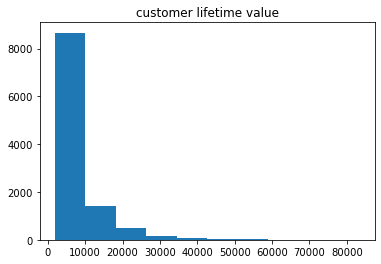

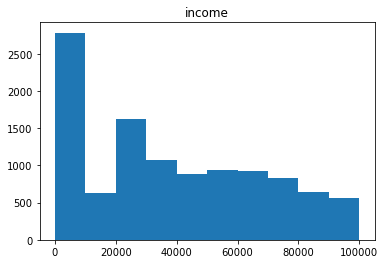

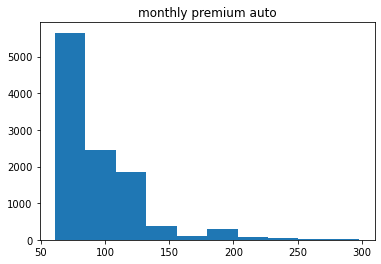

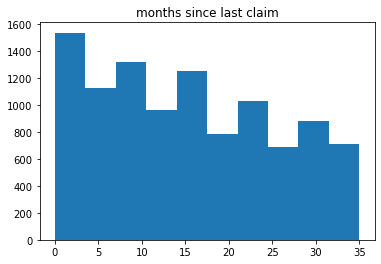

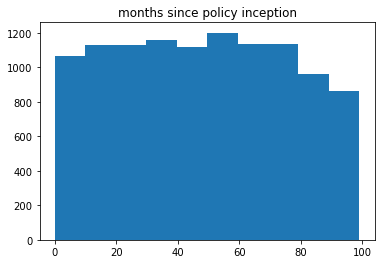

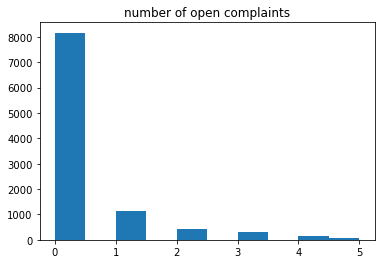

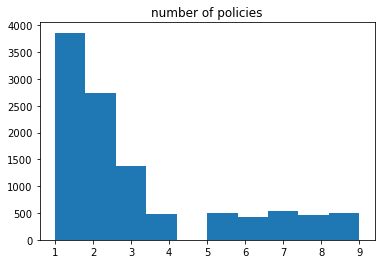

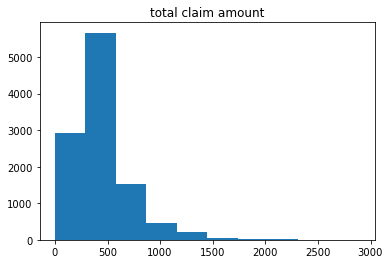

In [205]:
draw_histograms(numericals)

In [206]:
#def draw_kde(data):
   # for col in data:
     #   sns.kdeplot(data = data, x = f"{col}")

In [207]:
#draw_kde(numericals)


For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.<br>

### Normalize (Numerical)

In [208]:
tca = numericals["total claim amount"]
numericals.drop("total claim amount", inplace = True, axis = "columns")

C:\Users\oezkan\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [210]:
numericals

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,9025.067525,23675,117,NaN,31,NaN,7
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7
10906,5259.444853,61146,65,7.0,68,0.0,6
10907,23893.304100,39837,201,11.0,63,0.0,2
10908,11971.977650,64195,158,0.0,27,4.0,6


In [211]:
numericals["number of open complaints"].fillna(numericals["number of open complaints"].median(), inplace = True)

C:\Users\oezkan\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [212]:
numericals

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,9025.067525,23675,117,NaN,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,0.0,7
10906,5259.444853,61146,65,7.0,68,0.0,6
10907,23893.304100,39837,201,11.0,63,0.0,2
10908,11971.977650,64195,158,0.0,27,4.0,6


In [213]:
numericals["months since last claim"].fillna(numericals["months since last claim"].mean(), inplace = True)


C:\Users\oezkan\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [214]:
numericals

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029,61,7.000000,52,0.0,9
1,2228.525238,0,64,3.000000,26,0.0,1
2,14947.917300,22139,100,34.000000,31,0.0,2
3,22332.439460,49078,97,10.000000,3,0.0,2
4,9025.067525,23675,117,15.149071,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.0,7
10906,5259.444853,61146,65,7.000000,68,0.0,6
10907,23893.304100,39837,201,11.000000,63,0.0,2
10908,11971.977650,64195,158,0.000000,27,4.0,6


In [215]:
import sklearn.preprocessing

In [216]:
def norm(col):
    total = 0
    for i in col:
        total += i ** 2
    return total**0.5


for i in numericals:
    numericals[f"{i}"] = numericals[f"{i}"]/norm(numericals[f"{i}"])

In [217]:
for i in numericals:
    numericals[f"{i}"] = numericals[f"{i}"]/norm(numericals[f"{i}"])


<ipython-input-217-f2194d8403e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[f"{i}"] = numericals[f"{i}"]/norm(numericals[f"{i}"])


In [218]:
numericals.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,0.004357,0.009525,0.005878,0.003716,0.008951,0.0,0.022526
1,0.002019,0.000000,0.006167,0.001593,0.004475,0.0,0.002503
2,0.013541,0.004391,0.009636,0.018051,0.005336,0.0,0.005006
3,0.020231,0.009733,0.009347,0.005309,0.000516,0.0,0.005006
4,0.008176,0.004695,0.011274,0.008043,0.005336,0.0,0.017520


Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

Bonus: split Data set into train and test sets

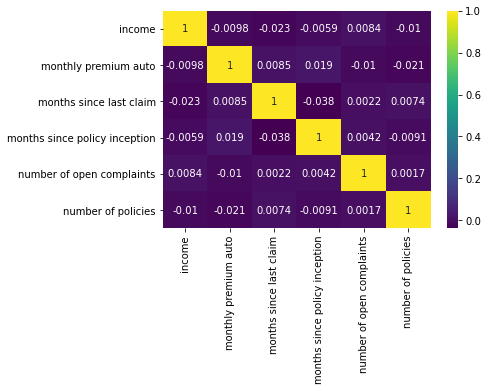

In [132]:
sns.heatmap(numericals.corr(), annot = True, cmap = cmap);


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()



In [134]:

x_train, x_test,y_train,y_test = train_test_split(numericals,tca,test_size =0.2)

In [136]:
lr.fit(x_train, y_train)

LinearRegression()

In [137]:
lr.score(x_test,y_test)


0.48933947774330233

## NOTES

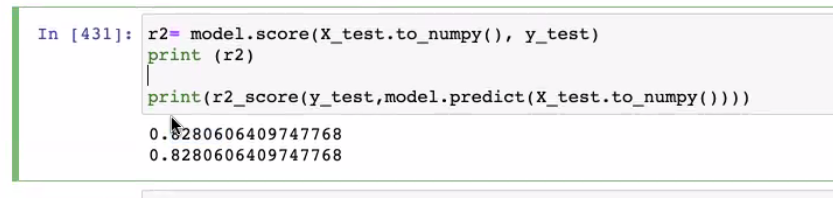

In [ ]:
# it is recomended by Rafa